# Score vs N

In this notebook we plot the score, # of tests, # of FPs and # of FNs for several values of N. 

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('default')
import seaborn as sns
import glob
import json
from src import utils
sns.set_theme(context='paper', style='dark', font_scale=4)

In [53]:
name="score_vs_R_k"
type_dict = {
    'days' : int,
    'false_negatives' : int,
    'false_positives' : int,
    'k' : float,
    'lambda_1' : float,
    'lambda_2' : float,
    'method' : str,
    'num_of_infected' : int,
    'num_of_tests' : int,
    'r' : float,
    'score' : float,
    'se' : float,
    'sp' : float,
    'seed' : int
}

In [54]:
files = glob.glob("./outputs/{name}_*.json".format(name=name))
# final_df = pd.DataFrame()
data = []
for fl_id, fl in enumerate(files):
    with open(fl,"r") as f:
        # df = pd.DataFrame.from_records(json.load(f), index=[fl_id])
        df = pd.DataFrame.from_records([json.load(f)])
        data.append(df)

input_df = pd.concat(data)

In [75]:
final_df = input_df.astype(type_dict) # Fix types
final_df = final_df.rename(columns={"method": "Method", "score": "Score", 'r' : 'R'}) # Rename columns
final_df = final_df.replace({'dorfman': 'Dorfman', 'individual': 'Individual', 'negbin': 'Neg.Bin.'}) # Rename methods

In [76]:
k_values = sorted(final_df['k'].unique())
r_values = sorted(final_df['R'].unique())
data = []
for r in r_values:
    for k in k_values:
        dorf_df = final_df[(final_df['R']==r) & (final_df['k']==k) & (final_df['Method']=='Dorfman')]
        negbin_df = final_df[(final_df['R']==r) & (final_df['k']==k) & (final_df['Method']=='Neg.Bin.')]
        temp_df = pd.DataFrame.from_dict({'R' : [r], 'k' : [k], 'Diff' : [dorf_df['Score'].mean() - negbin_df['Score'].mean()]})
        data.append(temp_df)

final_df = pd.concat(data)
final_df = final_df.pivot('R', 'k', 'Diff')

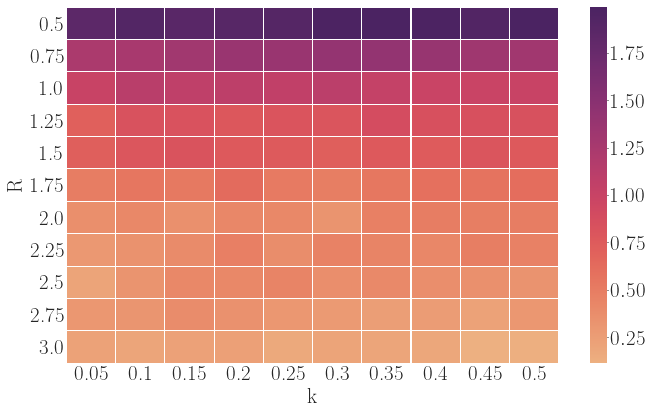

In [80]:
utils.latexify(fig_width=10, font_scale=3)
# N_values = sorted(final_df['N'].unique())
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
ax = sns.heatmap(data=final_df, cmap='flare', linewidths=0.05)
# ax = sns.lineplot(data=final_df, x="N", y="Score", hue="Method", palette='deep', style="Method", markers=marker_dict,
                    # dashes=None, legend=None, ci=95)
# ax.set_xticks(N_values)
# ax.set_xticklabels(N_values)
# ax.legend(['Individual', 'Dorfman', 'Neg.Bin.'])
plt.tight_layout()
plt.savefig('figures/{name}.pdf'.format(name=name))